In [1]:
import my_modules.monte_carlo as mc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

C:\Users\jdivers\PycharmProjects\df_image_analysis\.venv\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
dw = mc.OpticalMedium(n=1.33, mu_a=0, mu_s=0, g=0, name='water', display_color='aqua')
g = mc.OpticalMedium(n=1.523, mu_a=0, mu_s=0, g=0, name='glass', display_color='gray')
t = mc.OpticalMedium(n=1.33, mu_a=5, mu_s=10, g=0.9, name='tissue', display_color='lightpink')
surroundings_n = 1.33

OD = 0.3205672345588178
ID = 0.27206723455881785
theta = np.arctan(-OD / 0.2)

sampler = mc.monte_carlo.ring_pattern((ID, OD), theta)
LED = mc.Illumination(pattern=sampler)
detector = mc.Detector(mc.monte_carlo.cone_of_acceptance(ID))

n = 500

# Simulation comparisons
| ID | System               | Tissue thickness | Simulation method | Recursion | Illumination direction | Illumination Incidence | Detector   | Comparison | Notes                                        |
|:---|:---------------------|:-----------------|:------------------|:----------|:-----------------------|:-----------------------|:-----------|:-----------|:---------------------------------------------|
| 1  | Tissue               | Inf              | Manual Method     | False     | Normal                 | Origin                 | None       | A          |                                              |
| 2  | Tissue               | Inf              | Photon Method     | False     | Normal                 | Origin                 | None       | AB         |                                              |
| 3  | Tissue               | Inf              | Photon Method     | Simple    | Normal                 | Origin                 | None       | BC         |                                              |
| 4  | Tissue               | Inf              | Photon Method     | Simple    | Oblique                | Origin                 | None       | CD         | Compared direciton sampling in sub-a and -b  |
| 5  | Tissue               | Inf              | Photon Method     | Simple    | Oblique                | Ring                   | None       | DE         | Compared location sampline in sub-a and -b   |
| 6  | Tissue               | Inf              | Photon Method     | Simple    | Oblique                | Ring                   | Inner cone | EF         | Compare detection accounting in sub-a and -b |
| 7  | Water, Tissue        | Inf              | Photon Method     | Simple    | Oblique                | Ring                   | Inner cone | FG         |                                              |
| 8  | Water, Glass, Tissue | Inf              | Photon Method     | Simple    | Oblique                | Ring                   | Inner cone | GH         |                                              |
| 9  | Water, Glass, Tissue | 1mm              | Photon Method     | Simple    | Oblique                | Ring                   | Inner cone | GH         |                                              |


## Simulation 1

In [3]:
s = mc.System(
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector, 0),
)
print(s)

 __________________ 
|------ -inf ------|
|-> Surroundings <-|
|------- 0 --------|
|->    Tissue    <-|
|------ inf -------|
 __________________ 


C:\Users\jdivers\PycharmProjects\df_image_analysis\my_modules\monte_carlo\monte_carlo.py:593: RuntimeWarning: divide by zero encountered in divide
  step = np.where(mu_t > 0, -np.log(np.random.rand(self.batch_size)) / mu_t, float('inf'))


0 total internal reflectance events.
0.00% of photons transmitted. 
0.53% of photons reflected 
99.44% of photons absorbed 
500 total photons simulated.
0.03% overage of photons.


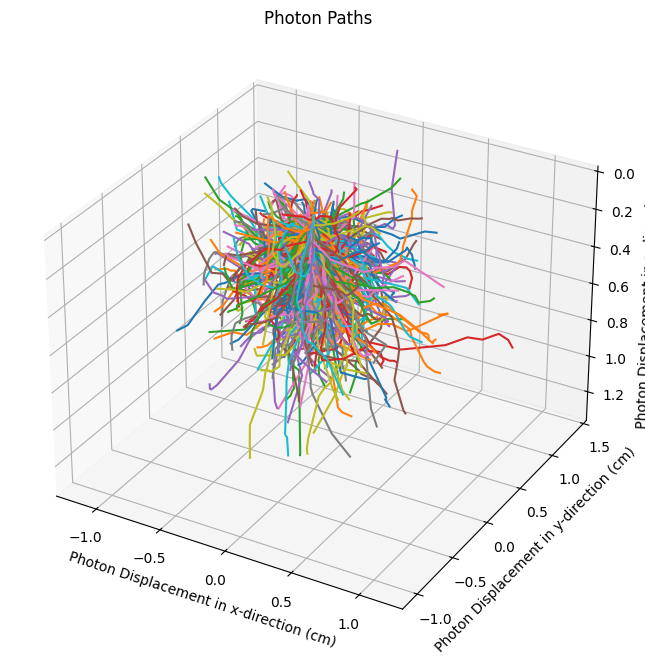

In [4]:
photon = mc.Photon(650, n=n, system=s, recurse=False, russian_roulette_constant=20)
while not photon.is_terminated:
    photon.absorb()
    photon.move()
    photon.scatter()
photon.plot_path()

print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

## Simulation 2

Using `photon.simulate()` method

0 total internal reflectance events.
0.00% of photons transmitted. 
0.58% of photons reflected 
99.38% of photons absorbed 
500 total photons simulated.
0.05% overage of photons.


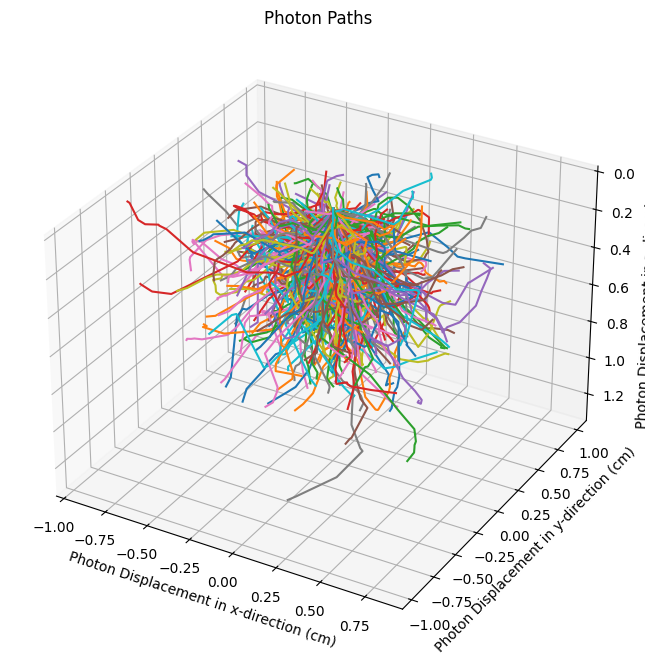

In [5]:
photon = mc.Photon(650, n=n, system=s, recurse=False, russian_roulette_constant=20)
photon.simulate()
photon.plot_path()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

## Simulation 3

Using recursion

0 total internal reflectance events.
0.00% of photons transmitted. 
0.56% of photons reflected 
99.51% of photons absorbed 
500 total photons simulated.
-0.07% overage of photons.


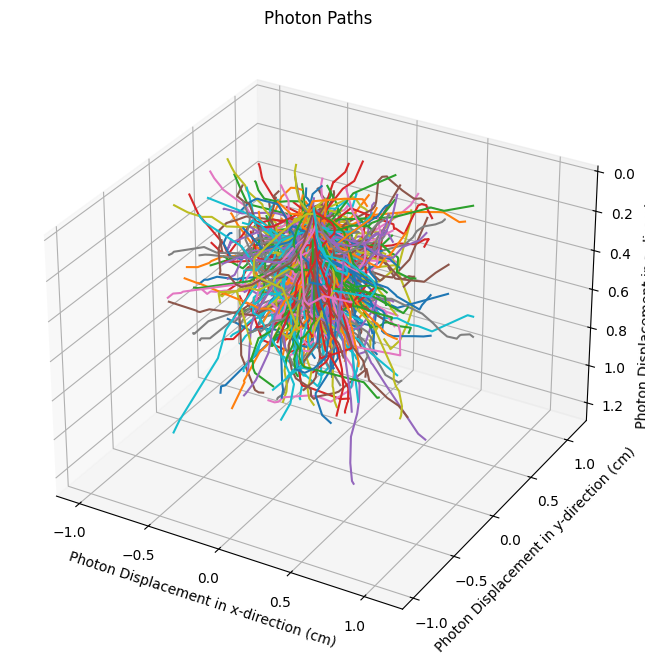

In [6]:
photon = mc.Photon(650, n=500, system=s, recurse=True, russian_roulette_constant=20)
photon.simulate()
photon.plot_path()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

## Simulation 4

Using angular incidence

### 4a

Angle set directly.

0 total internal reflectance events.
0.00% of photons transmitted. 
4.16% of photons reflected 
95.79% of photons absorbed 
500 total photons simulated.
0.05% overage of photons.


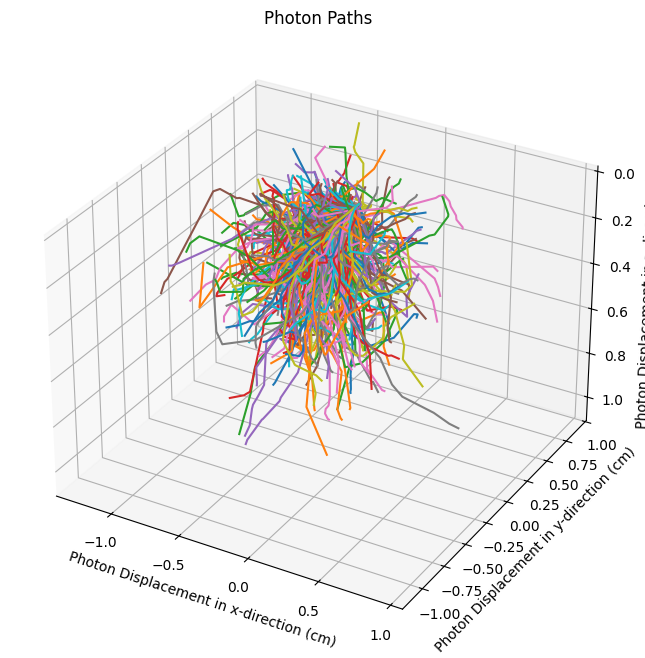

In [7]:
phi = 2 * np.pi * np.random.rand()
dir_cos = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
photon = mc.Photon(650, n=n, directional_cosines=dir_cos, system=s, recurse=True, russian_roulette_constant=20)
photon.simulate()
photon.plot_path()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

### 4b

Angle sampled from `sampler()`

0 total internal reflectance events.
0.00% of photons transmitted. 
4.31% of photons reflected 
95.71% of photons absorbed 
500 total photons simulated.
-0.03% overage of photons.


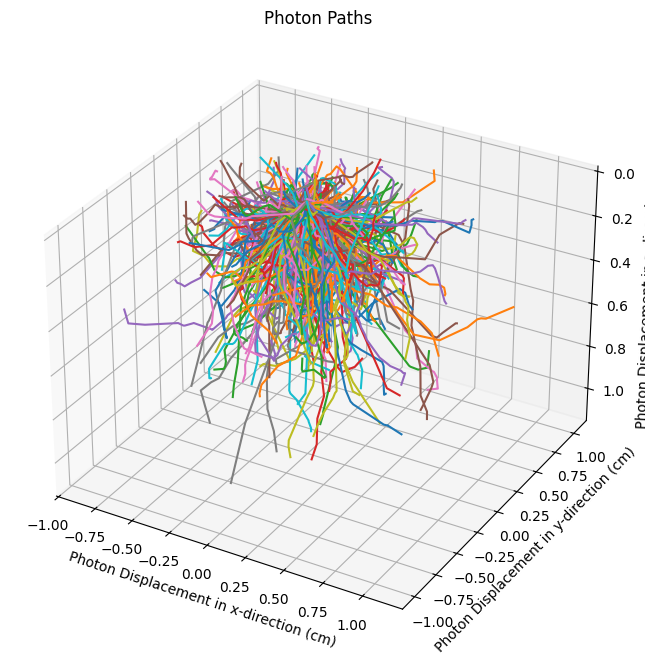

In [8]:
_, direction = sampler(n)
photon = mc.Photon(650, n=n, directional_cosines=direction, system=s, recurse=True, russian_roulette_constant=20)
photon.simulate()
photon.plot_path()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

## Simulation 5

Using location distribution

### 5a

location from `sampler()`

0 total internal reflectance events.
0.00% of photons transmitted. 
4.51% of photons reflected 
95.50% of photons absorbed 
500 total photons simulated.
-0.01% overage of photons.


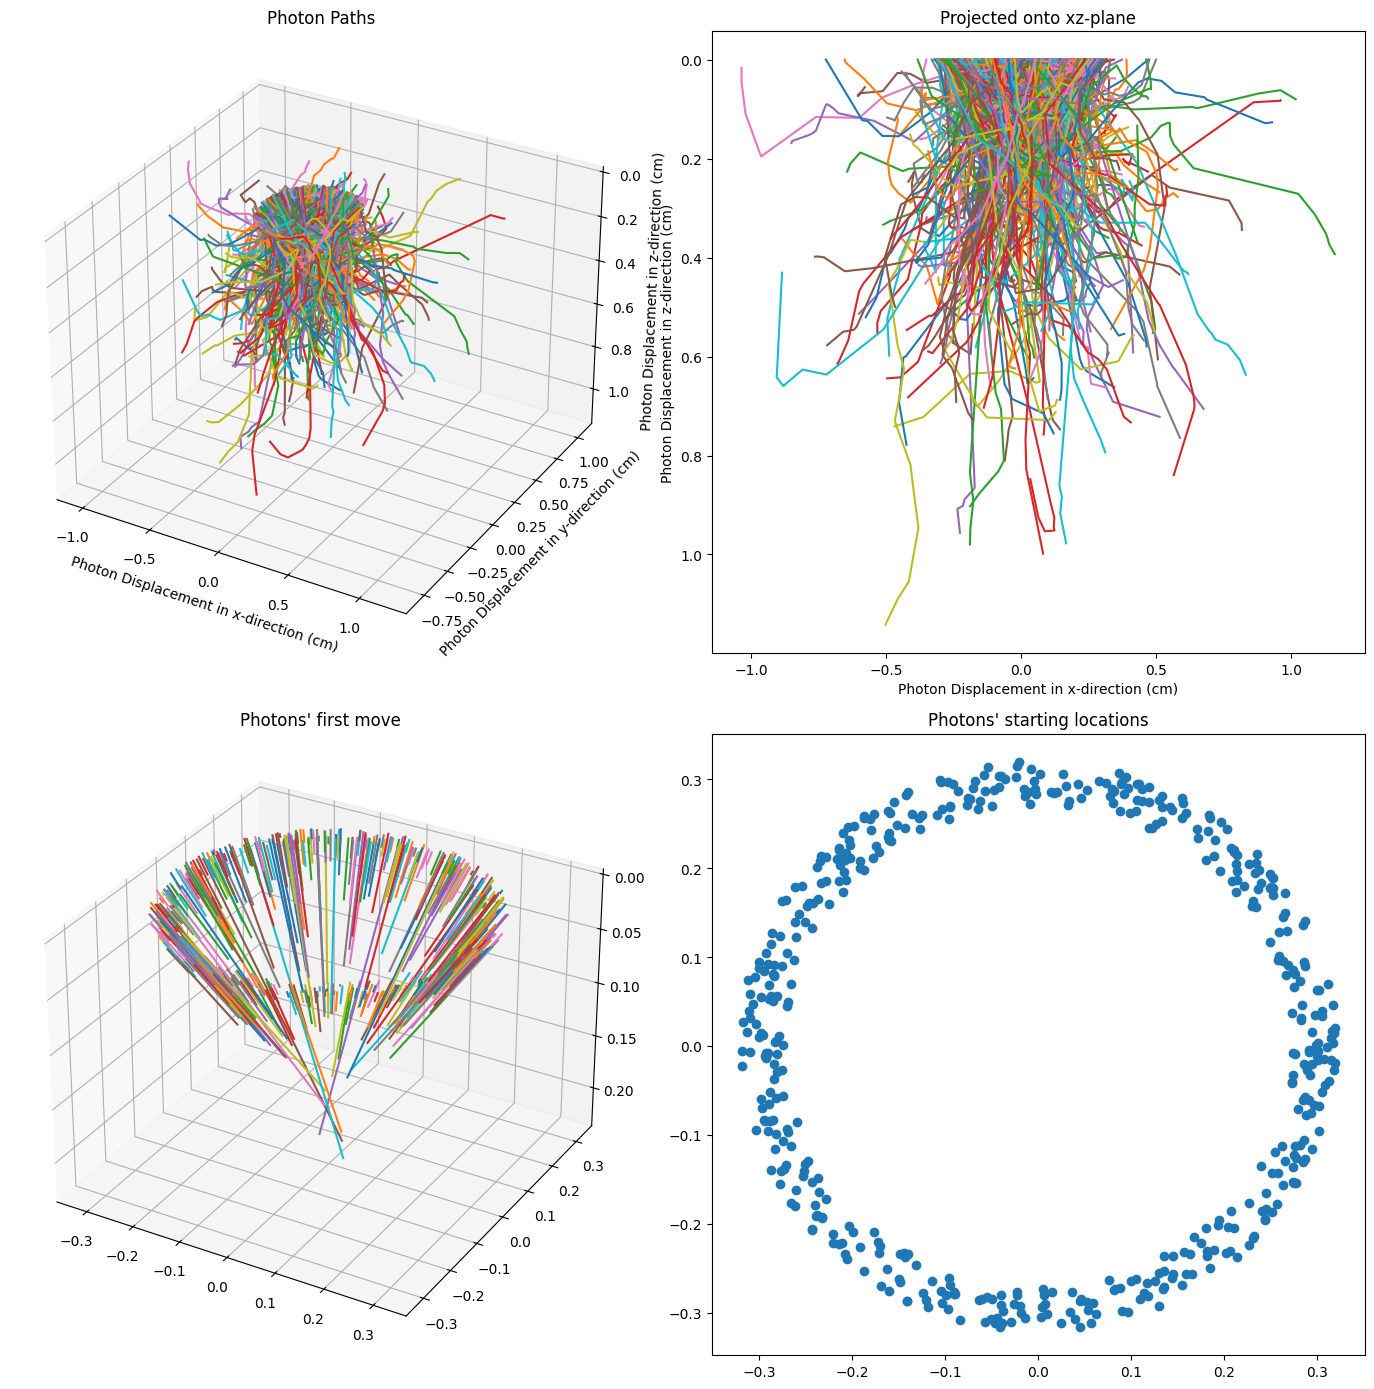

In [9]:
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(2, 2, 1, projection='3d'), fig.add_subplot(2, 2, 2), 
    fig.add_subplot(2, 2, 3, projection='3d'), fig.add_subplot(2, 2, 4)
])

location, direction = sampler(n)
photon = mc.Photon(650, n=n, location_coordinates=location, directional_cosines=direction, system=s, recurse=True, russian_roulette_constant=20)
photon.simulate()

photon.plot_path(axes=ax[0])
photon.plot_path(project_onto='xz', axes=[ax[1]])
x,y,z = [photon.location_history[: , i, :2] for i in range(3)]
for i in range(n):
    ax[2].plot(x[i],y[i],z[i])
ax[3].scatter(*photon.location_history[:, :2, 0].T)
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
fig.tight_layout()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

### 5b

location and direction from `system.beam()` 

0 total internal reflectance events.
0.00% of photons transmitted. 
4.39% of photons reflected 
95.57% of photons absorbed 
500 total photons simulated.
0.04% overage of photons.


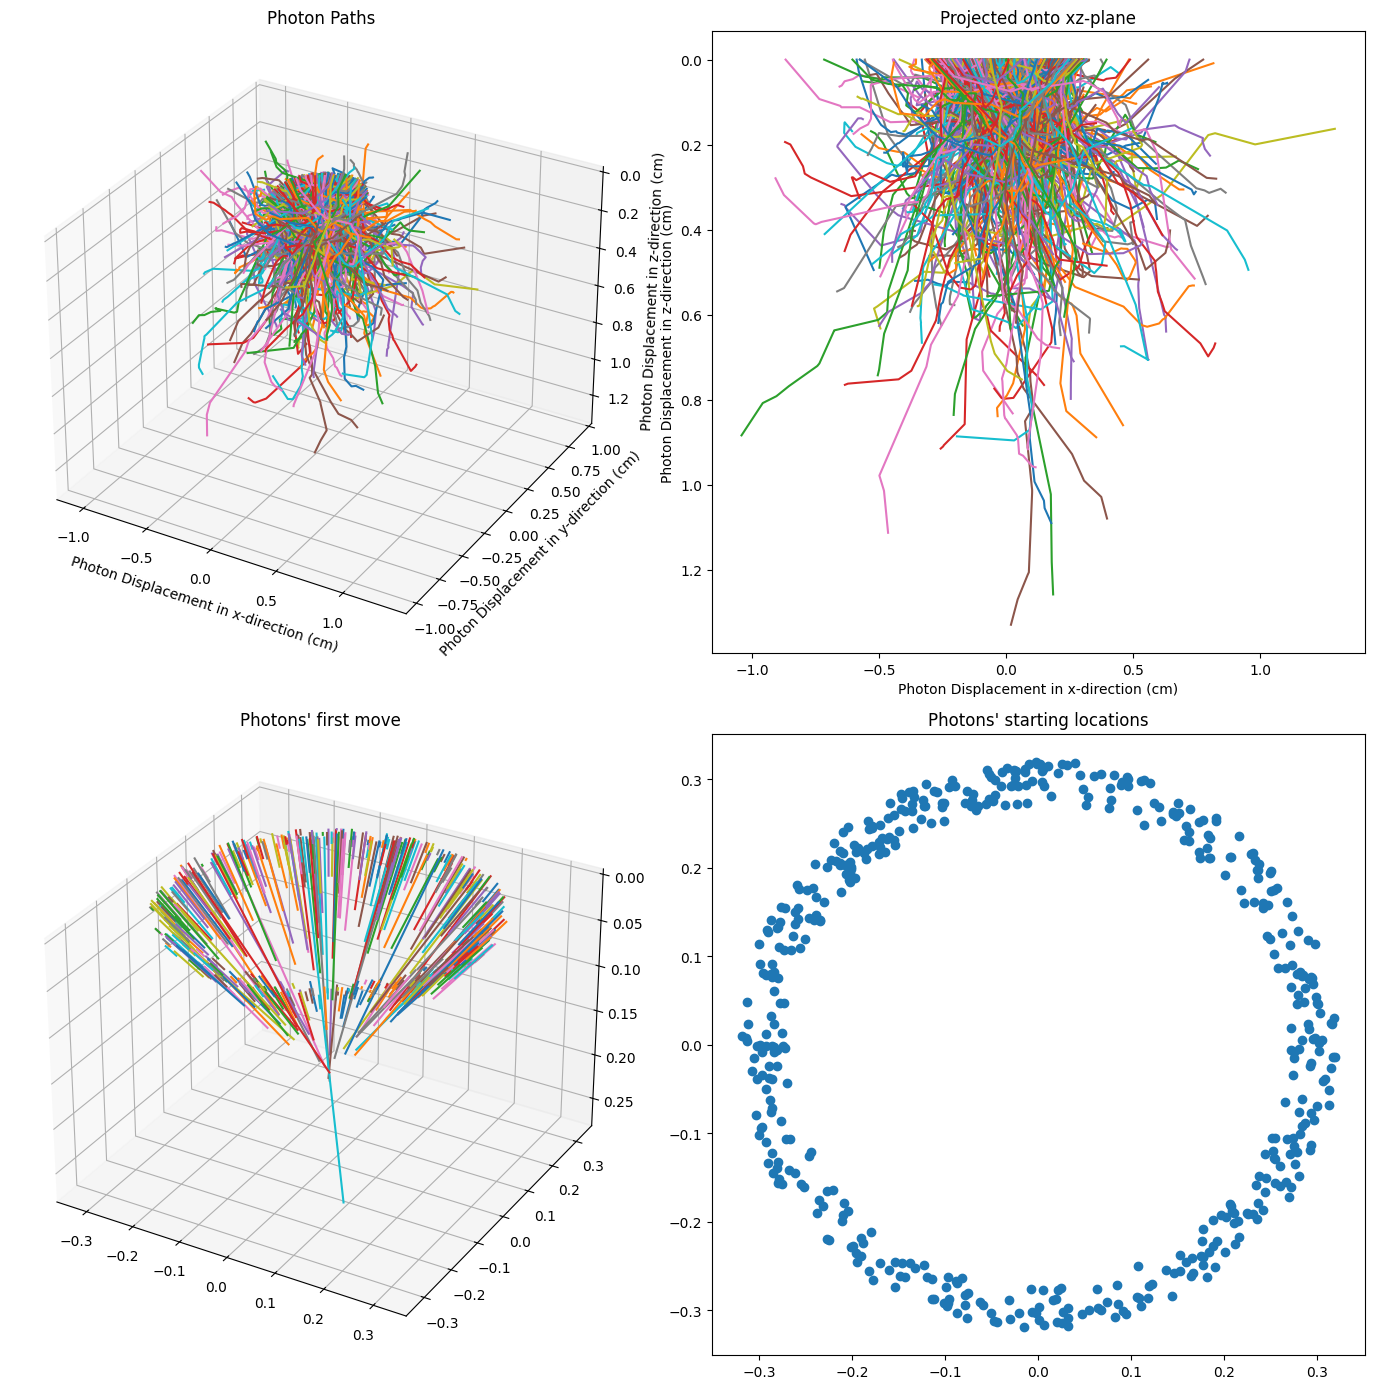

In [10]:
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(2, 2, 1, projection='3d'), fig.add_subplot(2, 2, 2), 
    fig.add_subplot(2, 2, 3, projection='3d'), fig.add_subplot(2, 2, 4)
])
photon = s.beam(n=n, recurse=True, russian_roulette_constant=20)
photon.simulate()

photon.plot_path(axes=ax[0])
photon.plot_path(project_onto='xz', axes=[ax[1]])
x,y,z = [photon.location_history[: , i, :2] for i in range(3)]
for i in range(n):
    ax[2].plot(x[i],y[i],z[i])
ax[3].scatter(*photon.location_history[:, :2, 0].T)
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
fig.tight_layout()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

## Simulation 6

Using detection region

### 6a

Manually testing for detection

0 total internal reflectance events.
0.00% of photons transmitted. 
4.22% of photons reflected 
95.80% of photons absorbed 
500 total photons simulated.
3.17% of photons detected 
-0.01% overage of photons.


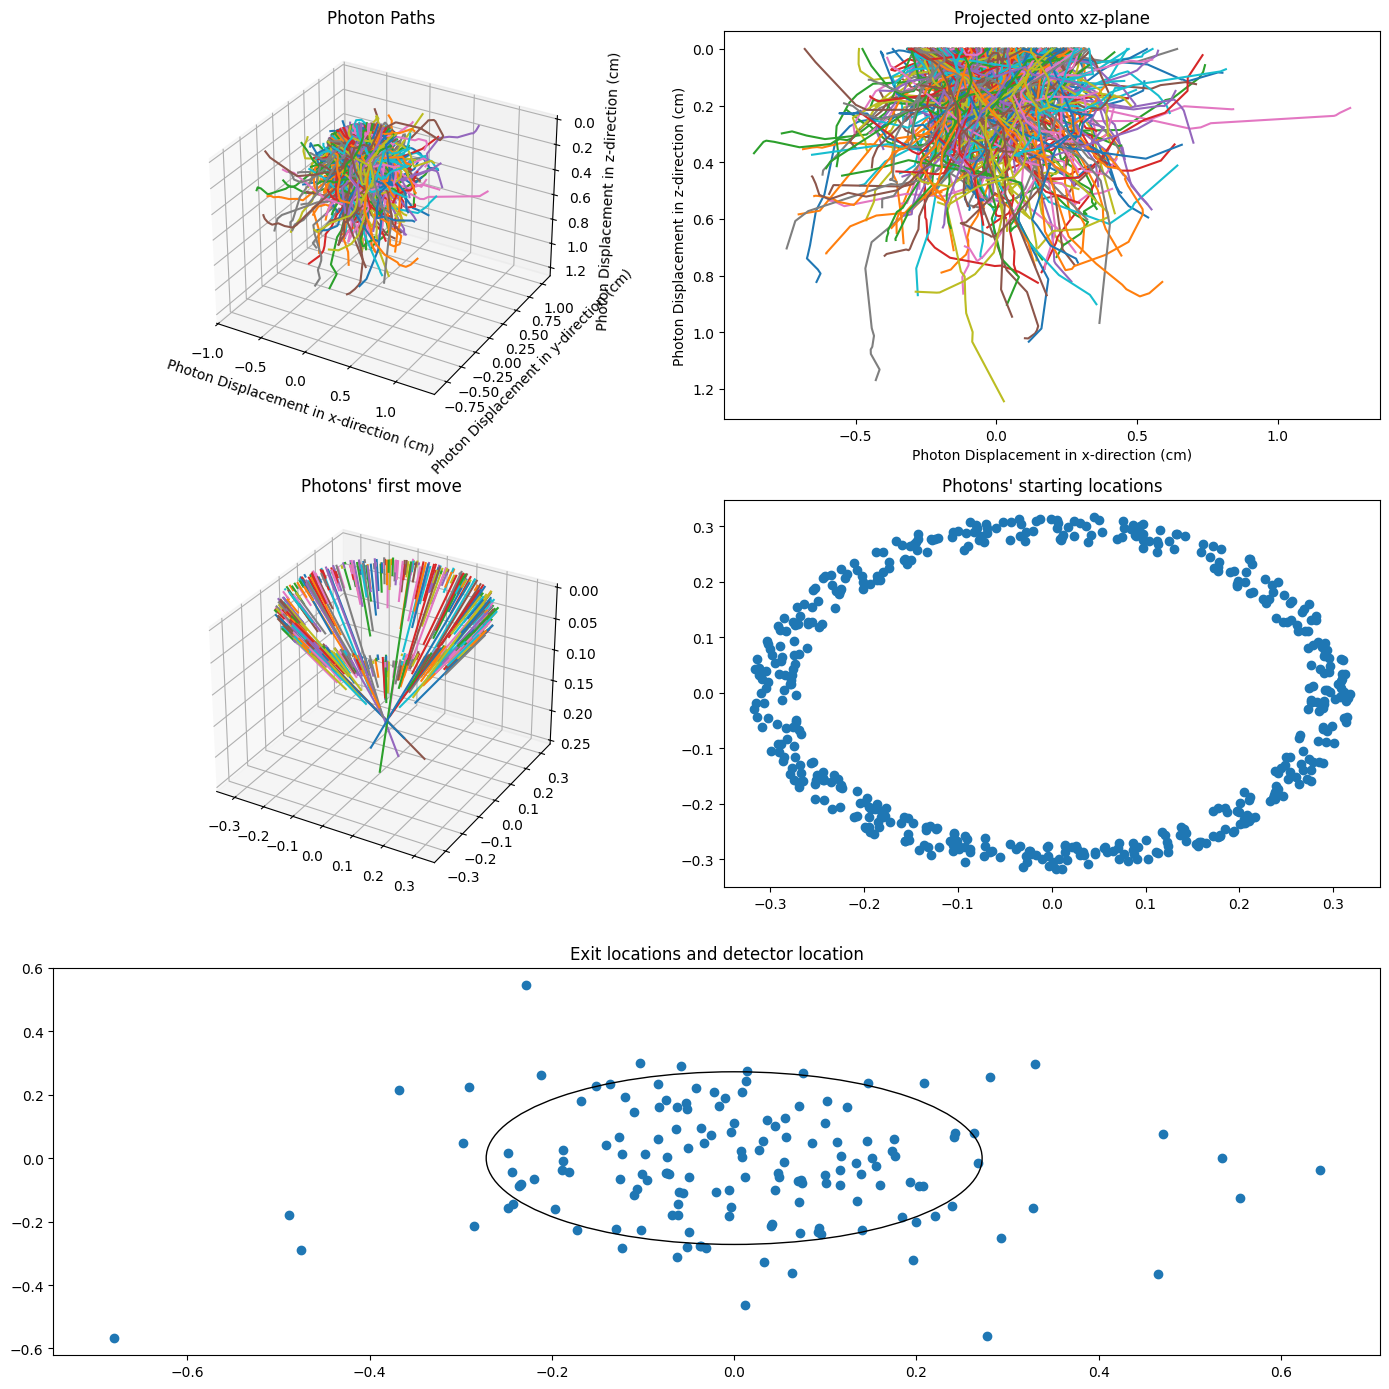

In [11]:
detected = 0
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(3, 2, 1, projection='3d'), fig.add_subplot(3, 2, 2), 
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),
    fig.add_subplot(3, 1, 3)
])
photon = s.beam(n=n, recurse=True, russian_roulette_constant=20)
photon.simulate()
exit_r = np.sqrt(photon.exit_location[:, 0] ** 2 + photon.exit_location[:, 1] ** 2)  if photon.exit_location is not None else float('inf')
detected += np.sum(np.where(exit_r < ID, photon.exit_weight, 0))

photon.plot_path(axes=ax[0])
photon.plot_path(project_onto='xz', axes=[ax[1]])
x,y,z = [photon.location_history[: , i, :2] for i in range(3)]
for i in range(n):
    ax[2].plot(x[i],y[i],z[i])
ax[3].scatter(*photon.location_history[:, :2, 0].T)
x,y,_ = photon.exit_location.T if photon.exit_location is not None else [(), (), ()]
ax[4].scatter(x,y)
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[4].add_patch(detector_circle)
ax[4].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:.2f}".format(detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

### 6b
Built-in detector method 

0 total internal reflectance events.
0.00% of photons transmitted. 
3.83% of photons reflected 
96.16% of photons absorbed 
500 total photons simulated.
3.01% of photons detected 
0.01% overage of photons.


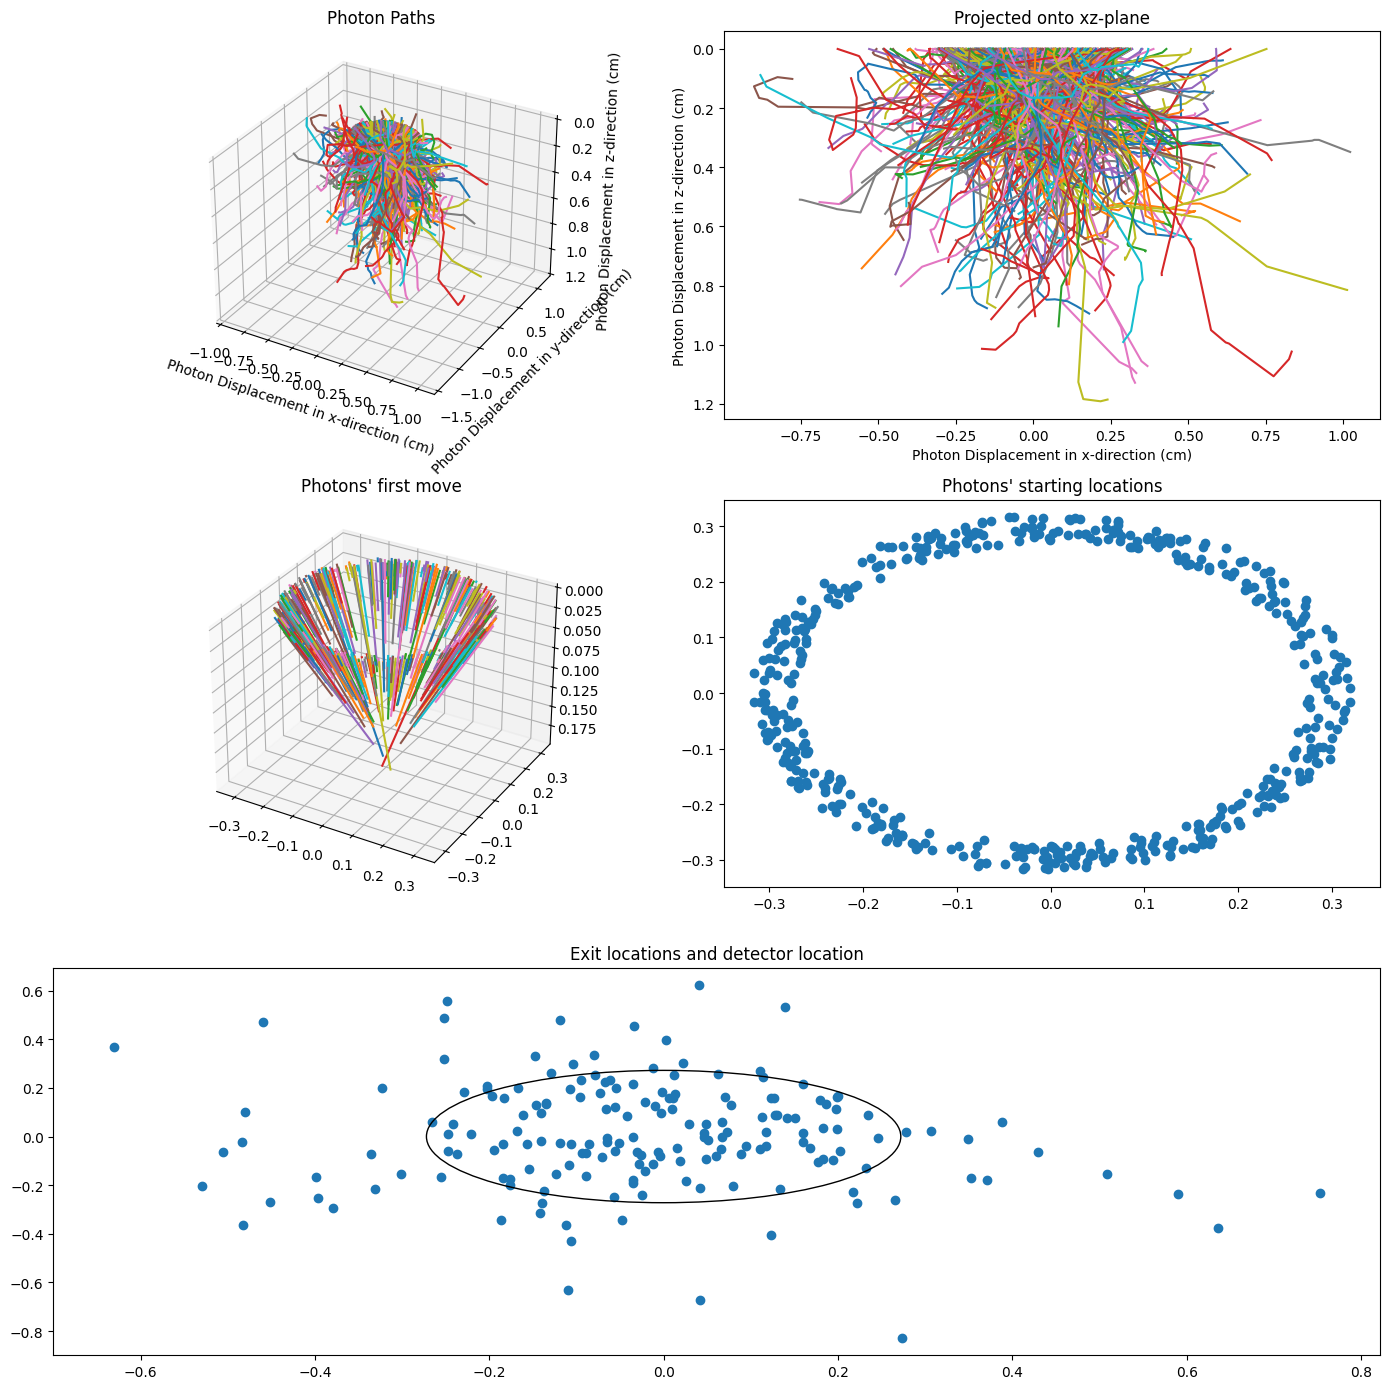

In [12]:
detector.reset()
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(3, 2, 1, projection='3d'), fig.add_subplot(3, 2, 2), 
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),
    fig.add_subplot(3, 1, 3)
])

photon = s.beam(n=n, recurse=True, russian_roulette_constant=20)
photon.simulate()

photon.plot_path(axes=ax[0])
photon.plot_path(project_onto='xz', axes=[ax[1]])
x,y,z = [photon.location_history[: , i, :2] for i in range(3)]
for i in range(n):
    ax[2].plot(x[i],y[i],z[i])
ax[3].scatter(*photon.location_history[:, :2, 0].T)
x,y,_ = photon.exit_location.T if photon.exit_location is not None else [(), (), ()]
ax[4].scatter(x,y)
ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[4].add_patch(detector_circle)
ax[4].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

## Simulation 7
Using system with water layer

In [26]:
s = mc.System(
    dw, 0.2,
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector,0)
)
print(s)

 __________________ 
|------ -inf ------|
|-> Surroundings <-|
|------- 0 --------|
|->    Water     <-|
|------ 0.2 -------|
|->    Tissue    <-|
|------ inf -------|
 __________________ 


0 total internal reflectance events.
0.00% of photons transmitted. 
9.75% of photons reflected 
90.32% of photons absorbed 
500 total photons simulated.
1.44% of photons detected 
-0.07% overage of photons.


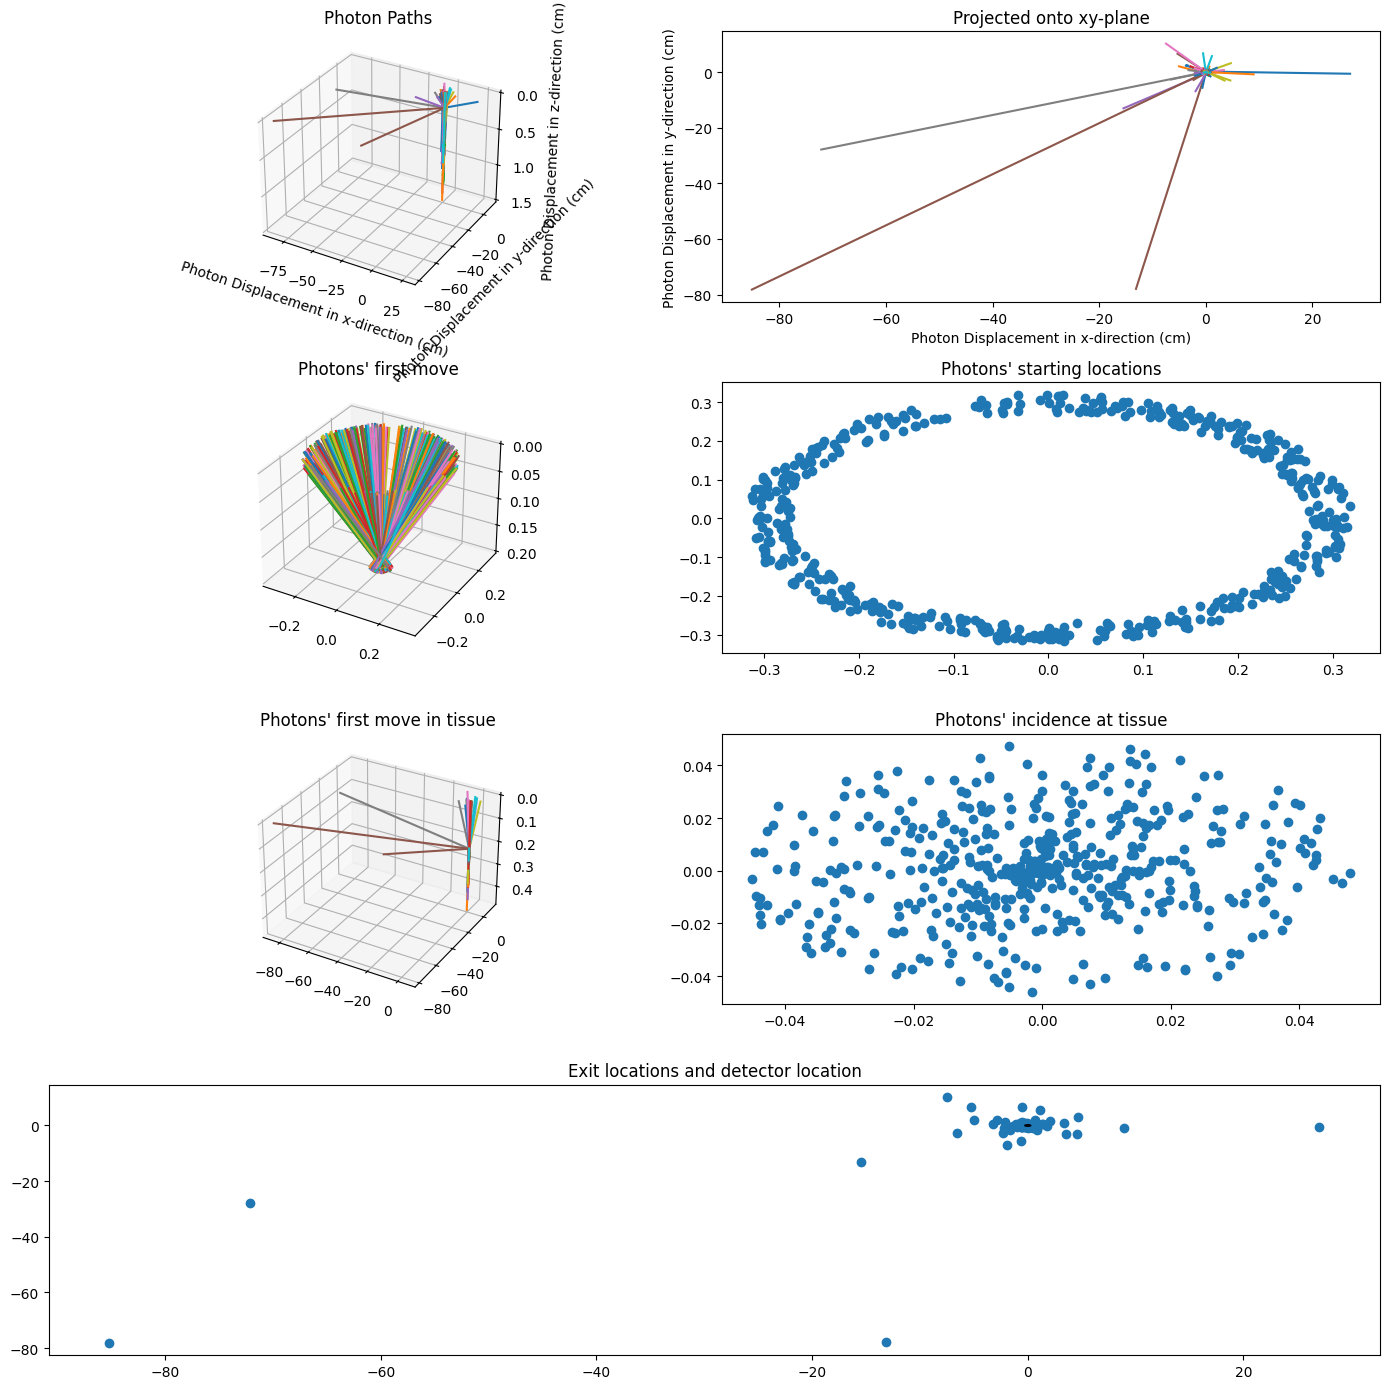

In [34]:
fig = plt.figure(figsize=(14, 14))
ax = np.array([
    fig.add_subplot(4, 2, 1, projection='3d'), fig.add_subplot(4, 2, 2), 
    fig.add_subplot(4, 2, 3, projection='3d'), fig.add_subplot(4, 2, 4),
    fig.add_subplot(4, 2, 5, projection='3d'), fig.add_subplot(4, 2, 6),
    fig.add_subplot(4, 1, 4)
])
detector.reset()
photon = s.beam(n=n, recurse=True, russian_roulette_constant=20)
photon.simulate()

photon.plot_path(axes=ax[0])
photon.plot_path(project_onto='xy', axes=[ax[1]])

# First move
x,y,z = [photon.location_history[: , i, :2] for i in range(3)]
for i in range(n):
    ax[2].plot(x[i],y[i],z[i])
    
# Starting point
ax[3].scatter(*photon.location_history[:, :2, 0].T)

# Into tissue
x,y,z = [photon.location_history[: , i, 1:2] for i in range(3)]
for i in range(n):
    ax[4].plot(x[i],y[i],z[i])

# Tissue incidence
ax[5].scatter(*photon.location_history[:, :2, 1].T)

# Exit location
x,y,_ = photon.exit_location.T if photon.exit_location is not None else [(), (), ()]
ax[6].scatter(x,y)

ax[2].set_title("Photons' first move")
ax[2].invert_zaxis()
ax[3].set_title("Photons' starting locations")
ax[4].set_title("Photons' first move in tissue")
ax[4].invert_zaxis()
ax[5].set_title("Photons' incidence at tissue")
detector_circle = patches.Circle((0,0), ID, edgecolor='black', facecolor='none')
ax[6].add_patch(detector_circle)
ax[6].set_title('Exit locations and detector location')
fig.tight_layout()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:.2f}".format(detector.n_detected / n * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

## Simulation 8
Using system with water and glass

In [21]:
s = mc.System(
    dw, 0.2,
    g, 0.017,
    t, float('inf'),
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector,0)
)
print(s)

 __________________ 
|------ -inf ------|
|-> Surroundings <-|
|------- 0 --------|
|->    Water     <-|
|------ 0.2 -------|
|->    Glass     <-|
|----- 0.217 ------|
|->    Tissue    <-|
|------ inf -------|
 __________________ 


ValueError: too many values to unpack (expected 3)

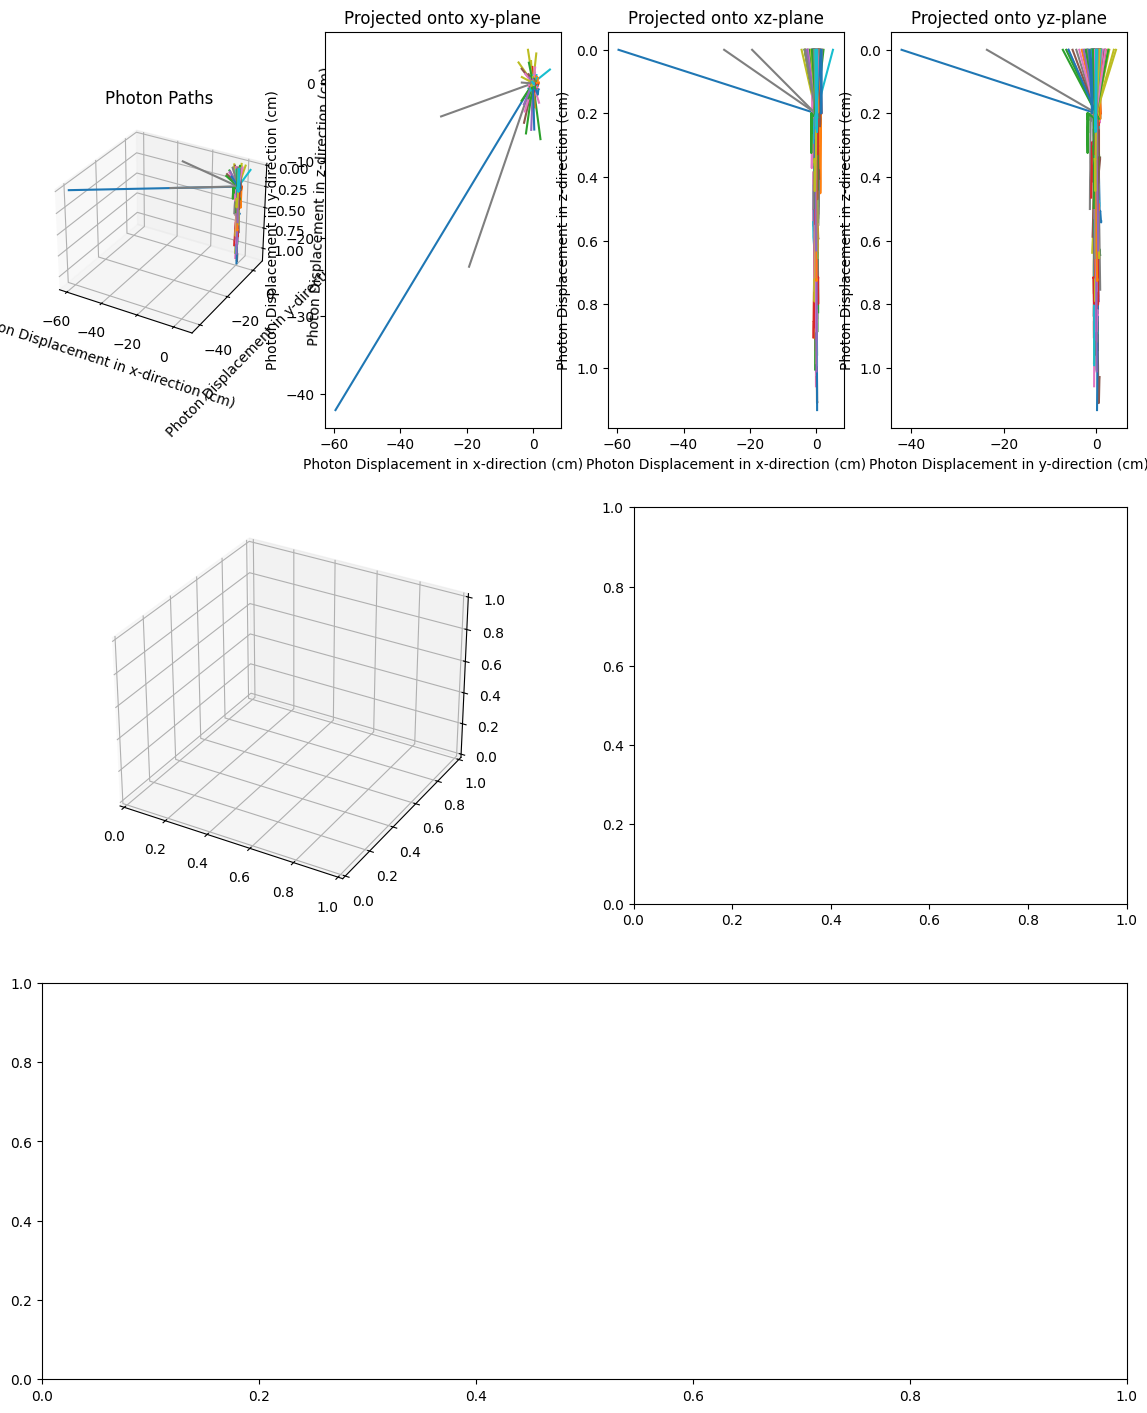

In [23]:
detector.reset()
fig = plt.figure(figsize=(14, 17.5))
ax = np.array([
    fig.add_subplot(3, 4, 1, projection='3d'), fig.add_subplot(3, 4, 2), fig.add_subplot(3, 4, 3), fig.add_subplot(3, 4, 4),  # Paths
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),  # Illumination pattern (beam in water and incidence at tissue)
    fig.add_subplot(3, 1, 3),  # Incidence and detection locations
])
j = 0
photon = s.beam(n=n, recurse=True, russian_roulette_constant=20)
photon.simulate()

photon.plot_path(axes=ax[0])
photon.plot_path(project_onto='xy', axes=[ax[1]])
photon.plot_path(project_onto='xz', axes=[ax[2]])
photon.plot_path(project_onto='yz', axes=[ax[3]])
x, y, z = zip(photon.location_history[0][0], photon.location_history[1][0])
ax[4].plot(x, y, z)
ax[6].scatter(*photon.location_history[0][0][:2], color='b', label='Incident photon starting locations' if i == 0 else '_nolegend_')
x, y, z = zip(photon.location_history[1][0], photon.location_history[2][0])
ax[5].scatter(*photon.location_history[1][0][:2], color='b')
if photon.exit_location is not None and photon.exit_location[2] == 0:
    x, y, z = photon.exit_location
    ax[6].scatter(x, y, color='r', label='Exit locations of reflected photons' if j == 0 else '_nolegend_')
    j += 1

ax[0].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5], zlim=[0.4, -0.01])
ax[1].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])
ax[2].set(xlim=[-0.5, 0.5], ylim=[0.8, -0.01])
s.represent_on_axis(ax=ax[2])
ax[3].set(xlim=[-0.5, 0.5], ylim=[0.8, -0.010])
s.represent_on_axis(ax=ax[3])
ax[4].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5], zlim=[0, 0.22])
ax[5].set(xlim=[-0.05, 0.05], ylim=[-0.05, 0.05])
ax[6].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])
ax[4].set_title("Photons' move to tissue")
ax[4].invert_zaxis()
ax[5].set_title("Photons' incident locations at tissue")
ax[6].set_title("Photons' incident and detection locations")
detector_circle = patches.Circle((0, 0), ID, edgecolor='black', facecolor='none', label='Detector region')
ax[6].add_patch(detector_circle)
ax[6].set_title('Incident and Exit locations')
ax[6].legend()
fig.tight_layout()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:.2f}".format((photon.R - detector.n_detected)) + ' photons rejected by detector aperture.')
print("{:.2f}".format(detector.n_detected / (n - (photon.R - detector.n_detected))  * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))

## Simulation 9
Finite tissue layer

In [ ]:
s = mc.System(
    dw, 0.2,
    g, 0.017,
    t, 0.1,
    surrounding_n=surroundings_n,
    illuminator=LED,
    detector=(detector, 0)
)
print(s)

In [ ]:
detector.reset()
fig = plt.figure(figsize=(14, 17.5))
ax = np.array([
    fig.add_subplot(3, 4, 1, projection='3d'), fig.add_subplot(3, 4, 2), fig.add_subplot(3, 4, 3), fig.add_subplot(3, 4, 4),  # Paths
    fig.add_subplot(3, 2, 3, projection='3d'), fig.add_subplot(3, 2, 4),  # Illumination pattern (beam in water and incidence at tissue)
    fig.add_subplot(3, 1, 3),  # Incidence and detection locations
])
j = 0
for i in range(n):

    photon = s.beam(recurse=True, russian_roulette_constant=20, tir_limit=10, recursion_limit=100, throw_recursion_error=False)
    photon.simulate()

    photon.plot_path(axes=ax[0], ignore_outside=False)
    photon.plot_path(project_onto='xy', axes=[ax[1]])
    photon.plot_path(project_onto='xz', axes=[ax[2]])
    photon.plot_path(project_onto='yz', axes=[ax[3]])
    x, y, z = zip(photon.location_history[0][0], photon.location_history[1][0], photon.location_history[2][0])
    ax[4].plot(x, y, z)
    ax[6].scatter(*photon.location_history[0][0][:2], color='b', label='Incident photon starting locations' if i == 0 else '_nolegend_')
    x, y, z = zip(photon.location_history[1][0], photon.location_history[2][0])
    ax[5].scatter(*photon.location_history[1][0][:2], color='b')
    if photon.exit_location is not None and photon.exit_location[2] == 0:
        x, y, z = photon.exit_location
        ax[6].scatter(x, y, color='r', label='Exit locations of reflected photons' if j == 0 else '_nolegend_')
        j += 1


ax[0].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5], zlim=[0.4, -0.01])
ax[1].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])
ax[2].set(xlim=[-0.5, 0.5], ylim=[0.33, -0.01])
s.represent_on_axis(ax=ax[2])
ax[3].set(xlim=[-0.5, 0.5], ylim=[0.33, -0.010])
s.represent_on_axis(ax=ax[3])
ax[4].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5], zlim=[0, 0.22])
ax[5].set(xlim=[-0.05, 0.05], ylim=[-0.05, 0.05])
ax[6].set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])
ax[4].set_title("Photons' move to tissue")
ax[4].invert_zaxis()
ax[5].set_title("Photons' incident locations at tissue")
ax[6].set_title("Photons' incident and detection locations")
detector_circle = patches.Circle((0, 0), ID, edgecolor='black', facecolor='none', label='Detector region')
ax[6].add_patch(detector_circle)
ax[6].set_title('Incident and Exit locations')
ax[6].legend()
fig.tight_layout()
print("{}".format(np.sum(photon.tir_count)) + ' total internal reflectance events.')
print("{:.2f}".format(photon.T / n * 100) + '% of photons transmitted. ')
print("{:.2f}".format(photon.R / n * 100) + '% of photons reflected ')
print("{:.2f}".format(photon.A / n * 100) + '% of photons absorbed ')
print("{:.0f}".format(sum([photon.T, photon.R, photon.A])) + ' total photons simulated.')
print("{:.2f}".format((photon.R - detector.n_detected)) + ' photons rejected by detector aperture.')
print("{:.2f}".format(detector.n_detected / (n - (photon.R - detector.n_detected))  * 100) + '% of photons detected ')
print("{:0.2f}% overage of photons.".format(100 * (n - sum([photon.T, photon.R, photon.A])) / n))